In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from keras.utils import to_categorical
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline
import matplotlib.pyplot as plt

In [47]:
digits = load_digits()
X, y = digits.data, digits.target
y_cat = to_categorical(y, 10)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

In [48]:
from keras.layers import BatchNormalization

In [55]:
def repeated_training(X_train,
                      y_train,
                      X_test,
                      y_test,
                      units=512,
                      activation='sigmoid',
                      optimizer='sgd',
                      do_bn=False,
                      epochs=10,
                      repeats=3):
    histories = []
    
    for repeat in range(repeats):
        K.clear_session()
        
        model = Sequential()
        
        # First fully connected layer
        model.add(Dense(units,
                       input_shape=X_train.shape[1:],
                       kernel_initializer='normal',
                       activation=activation))
        
        if do_bn:
            model.add(BatchNormalization())
        
        # Second fully connected layer
        model.add(Dense(units,
                       kernel_initializer='normal',
                       activation=activation))
        
        if do_bn:
            model.add(BatchNormalization())
        
        # third fully connect layer
        model.add(Dense(units,
                       kernel_initializer='normal',
                       activation=activation))
        
        if do_bn:
            model.add(BatchNormalization())

        # output layer
        model.add(Dense(10, activation='softmax'))
        
        model.compile(optimizer,
                      'categorical_crossentropy',
                      metrics=['accuracy'])
        
        h = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=epochs,
                      verbose=0)
        histories.append([h.history['acc'], h.history['val_acc']])
        print(repeat, end=' ')
    
    histories = np.array(histories)
    
    # calculate mean and standard deviation across repeats:
    mean_acc = histories.mean(axis=0)
    std_acc = histories.std(axis=0)
    
    return mean_acc[0], std_acc[0], mean_acc[1], std_acc[1]

In [56]:
mean_acc, std_acc, mean_acc_val, std_acc_val = repeated_training(X_train, y_train, X_test, y_test, do_bn=False)

0 1 2 

In [57]:
mean_acc_bn, std_acc_bn, mean_acc_val_bn, std_acc_val_bn = repeated_training(X_train, y_train, X_test, y_test, do_bn=True)

0 1 2 

In [60]:
def plot_mean_std(m, s):
    plt.plot(m)
    plt.fill_between(range(len(m)), m-s, m+s, alpha=0.1)

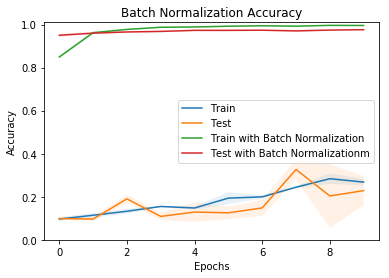

In [61]:
plot_mean_std(mean_acc, std_acc)
plot_mean_std(mean_acc_val, std_acc_val)
plot_mean_std(mean_acc_bn, std_acc_bn)
plot_mean_std(mean_acc_val_bn, std_acc_val_bn)
plt.ylim(0, 1.01)
plt.title('Batch Normalization Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalizationm'])